## Create a new DataBase and name it Employee

### Database Schema

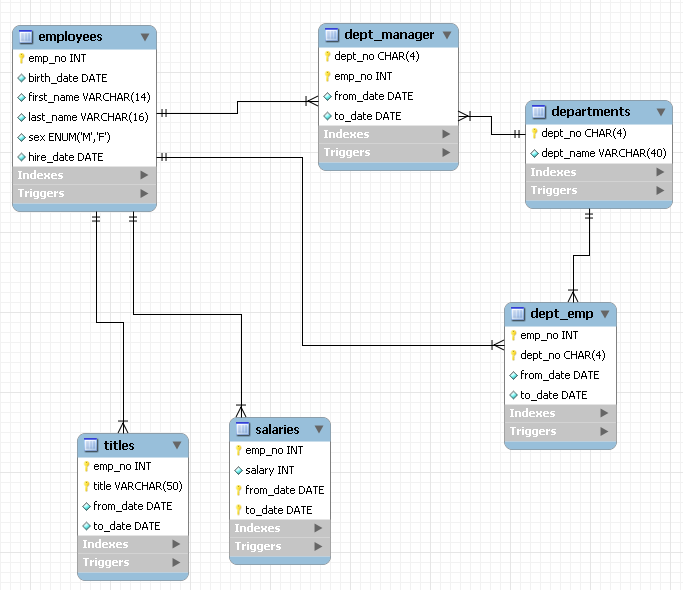

### Tables

In [ ]:
CREATE TABLE employees (
    emp_no      INT             NOT NULL,
    birth_date  DATE            NOT NULL,
    first_name  VARCHAR(14)     NOT NULL,
    last_name   VARCHAR(16)     NOT NULL,
    gender      NOT NULL,    
    hire_date   DATE            NOT NULL,
    PRIMARY KEY (emp_no)
);

In [ ]:
CREATE TABLE departments 
(
    dept_no  CHAR(4) NOT NULL,
    dept_name   VARCHAR(40) NOT NULL,
    PRIMARY KEY (dept_no),
    UNIQUE (dept_name) -- Unique constraint on dept_name
);

In [ ]:

CREATE TABLE dept_manager (
   emp_no       INT             NOT NULL,
   dept_no      CHAR(4)         NOT NULL,
   from_date    DATE            NOT NULL,
   to_date      DATE            NOT NULL,
   FOREIGN KEY (emp_no)  REFERENCES employees (emp_no)    ON DELETE CASCADE,
   FOREIGN KEY (dept_no) REFERENCES departments (dept_no) ON DELETE CASCADE,
   PRIMARY KEY (emp_no,dept_no)
); 

In [ ]:
CREATE TABLE dept_emp (
    emp_no      INT             NOT NULL,
    dept_no     CHAR(4)         NOT NULL,
    from_date   DATE            NOT NULL,
    to_date     DATE            NOT NULL,
    FOREIGN KEY (emp_no)  REFERENCES employees   (emp_no)  ON DELETE CASCADE,
    FOREIGN KEY (dept_no) REFERENCES departments (dept_no) ON DELETE CASCADE,
    PRIMARY KEY (emp_no,dept_no)
);

In [ ]:
CREATE TABLE titles (
    emp_no      INT             NOT NULL,
    title       VARCHAR(50)     NOT NULL,
    from_date   DATE            NOT NULL,
    to_date     DATE,
    FOREIGN KEY (emp_no) REFERENCES employees (emp_no) ON DELETE CASCADE,
    PRIMARY KEY (emp_no,title, from_date)
); 

In [ ]:
CREATE TABLE salaries (
    emp_no      INT             NOT NULL,
    salary      INT             NOT NULL,
    from_date   DATE            NOT NULL,
    to_date     DATE            NOT NULL,
    FOREIGN KEY (emp_no) REFERENCES employees (emp_no) ON DELETE CASCADE,
    PRIMARY KEY (emp_no, from_date)
); 

### Views

In [ ]:
CREATE OR REPLACE VIEW dept_emp_latest_date AS
    SELECT emp_no, MAX(from_date) AS from_date, MAX(to_date) AS to_date
    FROM dept_emp
    GROUP BY emp_no;

#### In SQLite 

In [ ]:
CREATE VIEW IF NOT EXISTS  dept_emp_latest_date AS
    SELECT emp_no, MAX(from_date) AS from_date, MAX(to_date) AS to_date
    FROM dept_emp
    GROUP BY emp_no;

In [ ]:
# shows only the current department for each employee
CREATE OR REPLACE VIEW current_dept_emp AS
    SELECT l.emp_no, dept_no, l.from_date, l.to_date
    FROM dept_emp d
        INNER JOIN dept_emp_latest_date l
        ON d.emp_no=l.emp_no AND d.from_date=l.from_date AND l.to_date = d.to_date;

#### In SQLite 

In [ ]:
CREATE VIEW IF NOT EXISTS current_dept_emp AS
  SELECT l.emp_no, dept_no, l.from_date, l.to_date
  FROM dept_emp d
  INNER JOIN dept_emp_latest_date l
  ON d.emp_no=l.emp_no AND d.from_date=l.from_date AND l.to_date = d.to_date;

### Insert Data into tables

In [ ]:
INSERT INTO `departments` VALUES 
('d001','Marketing'),
('d002','Finance'),
('d003','Human Resources'),
('d004','Production'),
('d005','Development'),
('d006','Quality Management'),
('d007','Sales'),
('d008','Research'),
('d009','Customer Service');

In [ ]:
INSERT INTO `employees` VALUES (10001,'1953-09-02','Georgi','Facello','M','1986-06-26'),
(10002,'1964-06-02','Bezalel','Simmel','F','1985-11-21'),
(10003,'1959-12-03','Parto','Bamford','M','1986-08-28'),
(10004,'1954-05-01','Chirstian','Koblick','M','1986-12-01'),
(10005,'1955-01-21','Kyoichi','Maliniak','M','1989-09-12'),
(10006,'1953-04-20','Anneke','Preusig','F','1989-06-02'),
(10007,'1957-05-23','Tzvetan','Zielinski','F','1989-02-10'),
(10008,'1958-02-19','Saniya','Kalloufi','M','1994-09-15'),
(10009,'1952-04-19','Sumant','Peac','F','1985-02-18'),
(10010,'1963-06-01','Duangkaew','Piveteau','F','1989-08-24'),
(10011,'1953-11-07','Mary','Sluis','F','1990-01-22'),
(10012,'1960-10-04','Patricio','Bridgland','M','1992-12-18'),
(10013,'1963-06-07','Eberhardt','Terkki','M','1985-10-20'),
(10014,'1956-02-12','Berni','Genin','M','1987-03-11'),
(10015,'1959-08-19','Guoxiang','Nooteboom','M','1987-07-02'),
(10016,'1961-05-02','Kazuhito','Cappelletti','M','1995-01-27'),
(10017,'1958-07-06','Cristinel','Bouloucos','F','1993-08-03'),
(10018,'1954-06-19','Kazuhide','Peha','F','1987-04-03'),
(10019,'1953-01-23','Lillian','Haddadi','M','1999-04-30'),
(10020,'1952-12-24','Mayuko','Warwick','M','1991-01-26'),
(10021,'1960-02-20','Ramzi','Erde','M','1988-02-10'),
(10022,'1952-07-08','Shahaf','Famili','M','1995-08-22'),
(10023,'1953-09-29','Bojan','Montemayor','F','1989-12-17');

In [ ]:
INSERT INTO `salaries` VALUES (10001,60117,'1986-06-26','1987-06-26'),
(10001,62102,'1987-06-26','1988-06-25'),
(10001,66074,'1988-06-25','1989-06-25'),
(10001,66596,'1989-06-25','1990-06-25'),
(10001,66961,'1990-06-25','1991-06-25'),
(10001,71046,'1991-06-25','1992-06-24'),
(10001,74333,'1992-06-24','1993-06-24'),
(10001,75286,'1993-06-24','1994-06-24'),
(10001,75994,'1994-06-24','1995-06-24'),
(10001,76884,'1995-06-24','1996-06-23'),
(10001,80013,'1996-06-23','1997-06-23'),
(10001,81025,'1997-06-23','1998-06-23'),
(10001,81097,'1998-06-23','1999-06-23'),
(10001,84917,'1999-06-23','2000-06-22'),
(10001,85112,'2000-06-22','2001-06-22'),
(10001,85097,'2001-06-22','2002-06-22'),
(10001,88958,'2002-06-22','9999-01-01');

In [ ]:
INSERT INTO `titles` VALUES (10001,'Senior Engineer','1986-06-26','9999-01-01'),
(10002,'Staff','1996-08-03','9999-01-01'),
(10003,'Senior Engineer','1995-12-03','9999-01-01'),
(10004,'Engineer','1986-12-01','1995-12-01'),
(10004,'Senior Engineer','1995-12-01','9999-01-01'),
(10005,'Senior Staff','1996-09-12','9999-01-01'),
(10005,'Staff','1989-09-12','1996-09-12'),
(10006,'Senior Engineer','1990-08-05','9999-01-01'),
(10007,'Senior Staff','1996-02-11','9999-01-01'),
(10007,'Staff','1989-02-10','1996-02-11'),
(10008,'Assistant Engineer','1998-03-11','2000-07-31'),
(10009,'Assistant Engineer','1985-02-18','1990-02-18'),
(10009,'Engineer','1990-02-18','1995-02-18'),
(10009,'Senior Engineer','1995-02-18','9999-01-01'),
(10010,'Engineer','1996-11-24','9999-01-01'),
(10011,'Staff','1990-01-22','1996-11-09'),
(10012,'Engineer','1992-12-18','2000-12-18'),
(10012,'Senior Engineer','2000-12-18','9999-01-01'),
(10013,'Senior Staff','1985-10-20','9999-01-01'),
(10014,'Engineer','1993-12-29','9999-01-01');

In [ ]:
INSERT INTO `dept_emp` VALUES (10001,'d005','1986-06-26','9999-01-01'),
(10002,'d007','1996-08-03','9999-01-01'),
(10003,'d004','1995-12-03','9999-01-01'),
(10004,'d004','1986-12-01','9999-01-01'),
(10005,'d003','1989-09-12','9999-01-01'),
(10006,'d005','1990-08-05','9999-01-01'),
(10007,'d008','1989-02-10','9999-01-01'),
(10008,'d005','1998-03-11','2000-07-31'),
(10009,'d006','1985-02-18','9999-01-01'),
(10010,'d004','1996-11-24','2000-06-26'),
(10010,'d006','2000-06-26','9999-01-01'),
(10011,'d009','1990-01-22','1996-11-09'),
(10012,'d005','1992-12-18','9999-01-01'),
(10013,'d003','1985-10-20','9999-01-01'),
(10014,'d005','1993-12-29','9999-01-01'),
(10015,'d008','1992-09-19','1993-08-22'),
(10016,'d007','1998-02-11','9999-01-01'); 